## Yelp Data Analysis: Trends, Insights, and Predictions

**Group Members**
1. Jonathan Blanco
2. Dylan Kakkanad
3. Neeharika Kamireddy
4. Pengru Lin
5. Yahui Wen

### 1. Problem Definition

This project aims to analyze text data in the form of user reviews, in conjunction with numerical information related to businesses and their users from the Yelp Dataset. We aim to utilize fundamental Spark methods to offload the heavy lifting to compile our dataset for analysis, carry out the necessary data cleaning steps, build an EDA, and apply some basic machine learning techniques. In doing so, we will uncover how information regarding various businesses and their reviews correlates with each other.

### 2. Data Source and Motivation

Our dataset is from the official Yelp website and it consists of 5 tables: business, review, user, checkin, and tips. (link [here](https://www.yelp.com/dataset/documentation/main)
). It is a comprehensive compilation of over 6 million reviews across over 150,000 businesses. The entire dataset amounts to approximately 10GB in storage.

**Data Description**

Our entire dataset consists of 5 tables:

1. **business.json**

| Column Name | Data Type | Description/Notes |
|:-----------:|:---------:|:------------------|
| address | string | Business address |
| attributes | struct | Business attributes, such as AcceptsInsurance, AgesAllowed, Alcohol, etc. |
| business_id | string | Unique identifier for the business |
| categories | string | Categories associated with the business |
| city | string | City where the business is located |
| hours | struct | Business hours for each day of the week |
| is_open | long | Indicator if the business is currently open (1) or closed (0) |
| latitude | double | Latitude of the business location |
| longitude | double | Longitude of the business location |
| name | string | Name of the business |
| postal_code | string | Postal code for the business location |
| review_count | long | Number of reviews for the business |
| stars | double | Star rating for the business |
| state | string | State where the business is located |



2. **review.json**

| Column Name | Data Type | Description/Notes |
|:-----------:|:---------:|:------------------|
| business_id | string | Unique identifier for the business being reviewed |
| cool | long | Number of 'cool' votes the review received |
| date | string | Date when the review was posted |
| funny | long | Number of 'funny' votes the review received |
| review_id | string | Unique identifier for the review |
| stars | double | Star rating given in the review |
| text | string | Text content of the review |
| useful | long | Number of 'useful' votes the review received |
| user_id | string | Unique identifier for the user who posted the review |



3. **user.json**

| Column Name | Data Type | Description/Notes |
|:-----------:|:---------:|:------------------|
| average_stars | double | Average star rating given by the user |
| compliment_cool | long | Number of 'cool' compliments received by the user |
| compliment_cute | long | Number of 'cute' compliments received by the user |
| compliment_funny | long | Number of 'funny' compliments received by the user |
| compliment_hot | long | Number of 'hot' compliments received by the user |
| compliment_list | long | Number of 'list' compliments received by the user |
| compliment_more | long | Number of 'more' compliments received by the user |
| compliment_note | long | Number of 'note' compliments received by the user |
| compliment_photos | long | Number of 'photos' compliments received by the user |
| compliment_plain | long | Number of 'plain' compliments received by the user |
| compliment_profile | long | Number of 'profile' compliments received by the user |
| compliment_writer | long | Number of 'writer' compliments received by the user |
| cool | long | Number of 'cool' votes received by the user |
| elite | string | Years the user was listed as 'elite' |
| fans | long | Number of fans the user has |
| friends | string | List of friends' user IDs |
| funny | long | Number of 'funny' votes received by the user |
| name | string | Name of the user |
| review_count | long | Number of reviews written by the user |
| useful | long | Number of 'useful' votes received by the user |
| user_id | string | Unique identifier for the user |
| yelping_since | string | Date when the user joined Yelp |



4. **tips.json**

| Column Name | Data Type | Description/Notes |
|:-----------:|:---------:|:------------------|
| business_id | string | Unique identifier for the business |
| compliment_count | long | Number of compliments received for the tip |
| date | string | Date when the tip was posted |
| text | string | Text content of the tip |
| user_id | string | Unique identifier for the user who posted the tip |



5. **checkin.json**

| Column Name | Data Type | Description/Notes |
|:-----------:|:---------:|:------------------|
| business_id | string | Unique identifier for the business |
| date | string | String containing a list of dates and times when customers checked in |


**Motivation**

The motivation for this project is to acquire a deeper understanding of consumer inclinations and the operational efficacy of businesses across diverse sectors. This endeavor aims to facilitate the formulation of bespoke marketing approaches and the enhancement of customer service. Additionally, it encompasses the exploration of predictive analytics to anticipate and adapt to emerging market trends, thereby fostering a proactive business environment.

### 3. Executive Summary

This project focuses on analyzing Yelp's dataset, which includes reviews on businesses across five tables: business, review, user, checkin, and tips. To derive insights from user reviews and business-related numerical data. Utilizing Spark for data processing, we worked on a comprehensive data analysis journey including data cleaning, EDA, and preliminary machine learning applications. Based on what we got from the data, we will derive some insights for the platform to improve their business, for example, correlations between user ratings and business attributes and the impact of reviews on business success.


### 4. Exploratory Data Analysis

#### 4.1 Import Data and Libraries

In [ ]:
!pip install plotly

In [ ]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import col, avg, explode, split, row_number, count, year, stddev, max, when
from pyspark.sql.window import Window
import plotly.graph_objs as go
import ipywidgets as widgets
from IPython.display import display

#### 4.2 Load Data

In [ ]:
data = "gs://yelp-data-ba843/notebooks/jupyter/data/"
df_review = spark.read.format("json").load(data + "yelp_academic_dataset_review.json")

In [ ]:
df_review.printSchema()

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)



In [ ]:
df_business = spark.read.format("json").load(data + "yelp_academic_dataset_business.json")
df_business.printSchema()

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

24/04/02 00:07:10 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [ ]:
df_checkin = spark.read.format("json").load(data + "yelp_academic_dataset_checkin.json")
df_checkin.printSchema()

root
 |-- business_id: string (nullable = true)
 |-- date: string (nullable = true)



In [ ]:
df_tips = spark.read.format("json").load(data + "yelp_academic_dataset_tip.json")
df_tips.printSchema()

root
 |-- business_id: string (nullable = true)
 |-- compliment_count: long (nullable = true)
 |-- date: string (nullable = true)
 |-- text: string (nullable = true)
 |-- user_id: string (nullable = true)



In [ ]:
df_user = spark.read.format("json").load(data + "yelp_academic_dataset_user.json")
df_user.printSchema()

root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- yelping_since: string (nullable = true)



#### 4.3 Data Preprocessing and Cleaning

In [ ]:
df_review.cache()

DataFrame[business_id: string, cool: bigint, date: string, funny: bigint, review_id: string, stars: double, text: string, useful: bigint, user_id: string]

In [ ]:
df_review.count()

6990280

In [ ]:
df_review.limit(3).toPandas()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,XQfwVwDr-v0ZS3_CbbE5Xw,0,2018-07-07 22:09:11,0,KU_O5udG6zpxOg-VcAEodg,3.0,"If you decide to eat here, just be aware it is...",0,mh_-eMZ6K5RLWhZyISBhwA
1,7ATYjTIgM3jUlt4UM3IypQ,1,2012-01-03 15:28:18,0,BiTunyQ73aT9WBnpR9DZGw,5.0,I've taken a lot of spin classes over the year...,1,OyoGAe7OKpv6SyGZT5g77Q
2,YjUWPpI6HXG530lwP-fb2A,0,2014-02-05 20:30:30,0,saUsX_uimxRlCVr67Z4Jig,3.0,Family diner. Had the buffet. Eclectic assortm...,0,8g_iMtfSiwikVnbP2etR0A


In [ ]:
df_business.cache()

DataFrame[address: string, attributes: struct<AcceptsInsurance:string,AgesAllowed:string,Alcohol:string,Ambience:string,BYOB:string,BYOBCorkage:string,BestNights:string,BikeParking:string,BusinessAcceptsBitcoin:string,BusinessAcceptsCreditCards:string,BusinessParking:string,ByAppointmentOnly:string,Caters:string,CoatCheck:string,Corkage:string,DietaryRestrictions:string,DogsAllowed:string,DriveThru:string,GoodForDancing:string,GoodForKids:string,GoodForMeal:string,HairSpecializesIn:string,HappyHour:string,HasTV:string,Music:string,NoiseLevel:string,Open24Hours:string,OutdoorSeating:string,RestaurantsAttire:string,RestaurantsCounterService:string,RestaurantsDelivery:string,RestaurantsGoodForGroups:string,RestaurantsPriceRange2:string,RestaurantsReservations:string,RestaurantsTableService:string,RestaurantsTakeOut:string,Smoking:string,WheelchairAccessible:string,WiFi:string>, business_id: string, categories: string, city: string, hours: struct<Friday:string,Monday:string,Saturday:string

In [ ]:
df_business.count()

150346

In [ ]:
df_business.limit(3).toPandas()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,"1616 Chapala St, Ste 2","(None, None, None, None, None, None, None, Non...",Pns2l4eNsfO8kk83dixA6A,"Doctors, Traditional Chinese Medicine, Naturop...",Santa Barbara,None,0,34.426679,-119.711197,"Abby Rappoport, LAC, CMQ",93101,7,5.0,CA
1,87 Grasso Plaza Shopping Center,"(None, None, None, None, None, None, None, Non...",mpf3x-BjTdTEA3yCZrAYPw,"Shipping Centers, Local Services, Notaries, Ma...",Affton,"(8:0-18:30, 0:0-0:0, 8:0-14:0, None, 8:0-18:30...",1,38.551126,-90.335695,The UPS Store,63123,15,3.0,MO
2,5255 E Broadway Blvd,"(None, None, None, None, None, None, None, Tru...",tUFrWirKiKi_TAnsVWINQQ,"Department Stores, Shopping, Fashion, Home & G...",Tucson,"(8:0-23:0, 8:0-22:0, 8:0-23:0, 8:0-22:0, 8:0-2...",0,32.223236,-110.880452,Target,85711,22,3.5,AZ


In [ ]:
df_tips.cache()

DataFrame[business_id: string, compliment_count: bigint, date: string, text: string, user_id: string]

In [ ]:
df_tips.count()

908915

In [ ]:
df_tips.limit(3).toPandas()

,business_id,compliment_count,date,text,user_id
0,3uLgwr0qeCNMjKenHJwPGQ,0,2012-05-18 02:17:21,Avengers time with the ladies.,AGNUgVwnZUey3gcPCJ76iw
1,QoezRbYQncpRqyrLH6Iqjg,0,2013-02-05 18:35:10,They have lots of good deserts and tasty cuban...,NBN4MgHP9D3cw--SnauTkA
2,MYoRNLb5chwjQe3c_k37Gg,0,2013-08-18 00:56:08,It's open even when you think it isn't,-copOvldyKh1qr-vzkDEvw


In [ ]:
df_checkin.cache()

DataFrame[business_id: string, date: string]

In [ ]:
df_checkin.count()

131930

In [ ]:
df_checkin.limit(3).toPandas()

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"


In [ ]:
df_user.cache()

DataFrame[average_stars: double, compliment_cool: bigint, compliment_cute: bigint, compliment_funny: bigint, compliment_hot: bigint, compliment_list: bigint, compliment_more: bigint, compliment_note: bigint, compliment_photos: bigint, compliment_plain: bigint, compliment_profile: bigint, compliment_writer: bigint, cool: bigint, elite: string, fans: bigint, friends: string, funny: bigint, name: string, review_count: bigint, useful: bigint, user_id: string, yelping_since: string]

In [ ]:
df_user.count()

1987897

In [ ]:
df_user.limit(3).toPandas()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,3.91,467,56,467,250,18,65,232,180,844,...,5994,2007,267,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",1259,Walker,585,7217,qVc8ODYU5SZjKXVBgXdI7w,2007-01-25 16:47:26
1,3.74,3131,157,3131,1145,251,264,1847,1946,7054,...,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...",3138,"ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",13066,Daniel,4333,43091,j14WgRoU_-2ZE1aw1dXrJg,2009-01-25 04:35:42
2,3.32,119,17,119,89,3,13,66,18,96,...,1003,"2009,2010,2011,2012,2013",52,"LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",1010,Steph,665,2086,2WnXYQFK0hXEoTxPtV2zvg,2008-07-25 10:41:00


**Data Cleaning**

In [ ]:
null_check = df_business.select([col(c).isNull().alias(c) for c in df_business.columns])
null_counts_business = null_check.agg(*[F.sum(F.col(c).cast("int")).alias(c) for c in null_check.columns])
null_counts_business.toPandas()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,0,13744,0,103,0,23223,0,0,0,0,0,0,0,0


The above analysis reveals the presence of null values in the `attributes`, `categories`, and `hours` columns. Given the nature of this data – predominantly array-based – conventional imputation methods like mean or median substitution are infeasible. Furthermore, the precision and specificity of this information, such as business `attributes` detailing parking availability, credit card acceptance, and `hours` dealing with business opening timings, necessitate absolute accuracy. Consequently, to uphold data integrity and relevance, it has been resolved to eliminate these rows with null values, rather than attempting to impute them. This approach ensures the retention of only the most reliable and pertinent data for subsequent analyses.

In [ ]:
df_business = df_business.where(col("categories").isNotNull() & col("attributes").isNotNull() & col("hours").isNotNull())
df_business.show(2)

+--------------------+--------------------+--------------------+--------------------+------+--------------------+-------+---------+-----------+-------------+-----------+------------+-----+-----+
|             address|          attributes|         business_id|          categories|  city|               hours|is_open| latitude|  longitude|         name|postal_code|review_count|stars|state|
+--------------------+--------------------+--------------------+--------------------+------+--------------------+-------+---------+-----------+-------------+-----------+------------+-----+-----+
|87 Grasso Plaza S...|{null, null, null...|mpf3x-BjTdTEA3yCZ...|Shipping Centers,...|Affton|{8:0-18:30, 0:0-0...|      1|38.551126| -90.335695|The UPS Store|      63123|          15|  3.0|   MO|
|5255 E Broadway Blvd|{null, null, null...|tUFrWirKiKi_TAnsV...|Department Stores...|Tucson|{8:0-23:0, 8:0-22...|      0|32.223236|-110.880452|       Target|      85711|          22|  3.5|   AZ|
+--------------------+---

In the above query, the null values from the three columns have been removed.

In [ ]:
null_check = df_business.select([col(c).isNull().alias(c) for c in df_business.columns])
null_counts_business = null_check.agg(*[F.sum(F.col(c).cast("int")).alias(c) for c in null_check.columns])
null_counts_business.toPandas()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
null_check = df_review.select([col(c).isNull().alias(c) for c in df_review.columns])
null_counts_review = null_check.agg(*[F.sum(F.col(c).cast("int")).alias(c) for c in null_check.columns])
null_counts_review.toPandas()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,0,0,0,0,0,0,0,0,0


In [ ]:
null_check = df_user.select([col(c).isNull().alias(c) for c in df_user.columns])
null_counts_user = null_check.agg(*[F.sum(F.col(c).cast("int")).alias(c) for c in null_check.columns])
null_counts_user.toPandas()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
null_check = df_tips.select([col(c).isNull().alias(c) for c in df_tips.columns])
null_counts_tips = null_check.agg(*[F.sum(F.col(c).cast("int")).alias(c) for c in null_check.columns])
null_counts_tips.toPandas()

,business_id,compliment_count,date,text,user_id
0,0,0,0,0,0


In [ ]:
null_check = df_checkin.select([col(c).isNull().alias(c) for c in df_checkin.columns])
null_counts_checkin = null_check.agg(*[F.sum(F.col(c).cast("int")).alias(c) for c in null_check.columns])
null_counts_checkin.toPandas()

,business_id,date
0,0,0


From the above queries, it can be noticed that all the other tables do not contain null values.

### 5. Queries and Visualizations

**Q1. How are the star reviews distributed in the data?**

In [ ]:
stars = df_review.groupBy("stars").agg(F.count('review_id').alias("Count")).orderBy(F.desc("Count"))
stars.show()

+-----+-------+
|stars|  Count|
+-----+-------+
|  5.0|3231627|
|  4.0|1452918|
|  1.0|1069561|
|  3.0| 691934|
|  2.0| 544240|
+-----+-------+



In [ ]:
stars = stars.toPandas()
stars

,stars,Count
0,5.0,3231627
1,4.0,1452918
2,1.0,1069561
3,3.0,691934
4,2.0,544240


This query results shows a distribution of review counts by star ratings. It shows that users tend to leave a 5-star review on the platform, which indicates that there is a tendency for users to be generally be satisfied with their experience.  Notably, the amount of 1-star reviews is more than 2 or 3 stars, which suggests that there is a high frequency of bad experiences among users. Ratings related to neural sentiment appear less than extreme ratings maybe because of people are less motivated to spend time reviewing experiences that didn't bring them extreme feelings.


**Q2. What is the trend of review amount by years?**

In [ ]:
df_review.select("date").show(5, truncate=False)

+-------------------+
|date               |
+-------------------+
|2018-07-07 22:09:11|
|2012-01-03 15:28:18|
|2014-02-05 20:30:30|
|2015-01-04 00:01:03|
|2017-01-14 20:54:15|
+-------------------+
only showing top 5 rows



In [ ]:
df_review = df_review.withColumn("date", F.to_timestamp("date", "yyyy-MM-dd HH:mm:ss"))
df_review.printSchema()

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: timestamp (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)



In [ ]:
df_review.limit(3).toPandas()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,XQfwVwDr-v0ZS3_CbbE5Xw,0,2018-07-07 22:09:11,0,KU_O5udG6zpxOg-VcAEodg,3.0,"If you decide to eat here, just be aware it is...",0,mh_-eMZ6K5RLWhZyISBhwA
1,7ATYjTIgM3jUlt4UM3IypQ,1,2012-01-03 15:28:18,0,BiTunyQ73aT9WBnpR9DZGw,5.0,I've taken a lot of spin classes over the year...,1,OyoGAe7OKpv6SyGZT5g77Q
2,YjUWPpI6HXG530lwP-fb2A,0,2014-02-05 20:30:30,0,saUsX_uimxRlCVr67Z4Jig,3.0,Family diner. Had the buffet. Eclectic assortm...,0,8g_iMtfSiwikVnbP2etR0A


In [ ]:
reviews_each_year = df_review.groupBy(F.year("date").alias("year")).agg(F.count("review_id").alias("review_count")).orderBy("year")
review_for_each_year = reviews_each_year.toPandas()
review_for_each_year

,year,review_count
0,2005,854
1,2006,3853
2,2007,15363
3,2008,48226
4,2009,74387
5,2010,138587
6,2011,230813
7,2012,286570
8,2013,383950
9,2014,522275


In [ ]:
df_review.agg(max('date')).show()

+-------------------+
|          max(date)|
+-------------------+
|2022-01-19 19:48:45|
+-------------------+



The reduced quantity of reviews observed in 2022 prompted an examination of the date corresponding to the latest review, which was determined to be January 19, 2022. Given this early cut-off in data for the year, including 2022 in the annual review count analysis could potentially mislead observers by presenting an anomalously low review count. Consequently, it was deemed better to exclude the 2022 data from this particular yearly aggregation to ensure a more accurate and representative analysis.

**Yearly Review count from 2005 - 2021**

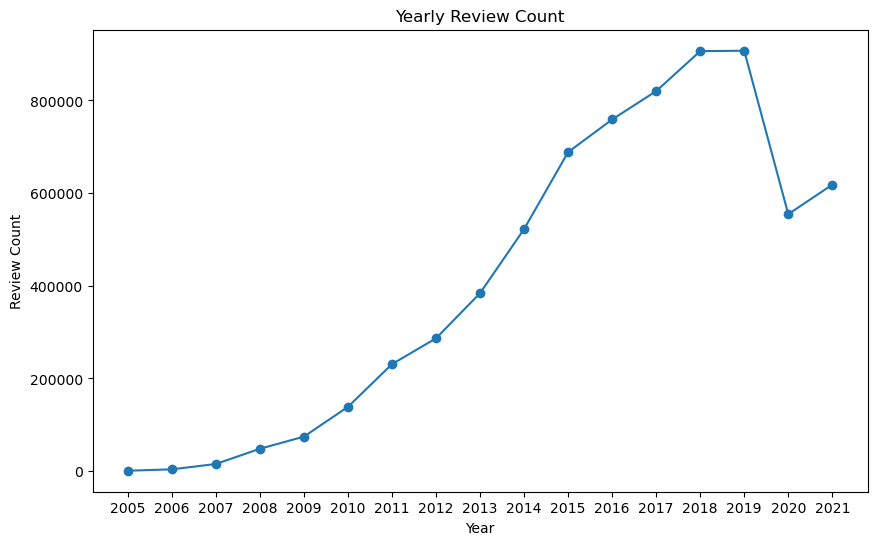

In [ ]:
review_less_than_2022 = review_for_each_year[review_for_each_year['year'] < 2022]
plt.figure(figsize=(10, 6))
plt.plot(review_less_than_2022['year'], review_less_than_2022['review_count'], marker='o')
plt.title('Yearly Review Count')
plt.xlabel('Year')
plt.ylabel('Review Count')
plt.xticks(review_less_than_2022['year'])
plt.show()

According to this graph, we can see a significant growth from 2005 to 2015. This suggests that the Yelp platform has a growing engagement, which means the business of Yelp gained success during this period. From 2015 to 2019, the review count remained stable at a high level, which indicates that the market and the user amount are stable. From 2020, the review amount has a sharp decline, which may be because of COVID-19. During this period, people stayed at home and businesses had to close, thus the reviews amount decreased sharply.

**Q3. What regions have more opportunities for businesses? Does more business mean higher reviews for states?**

In [ ]:
df_business.createOrReplaceTempView("business")
df_review.createOrReplaceTempView("review")

In [ ]:
busi = spark.sql('''
SELECT *,
       CASE
           WHEN LOWER(categories) LIKE '%medicine%' THEN 'Medicine'
           WHEN LOWER(categories) LIKE '%restaurant%' THEN 'Food'
           WHEN LOWER(categories) LIKE '%pet%' THEN 'Pet'
           WHEN LOWER(categories) LIKE '%school%' THEN 'Education'
           WHEN LOWER(categories) LIKE '%shopping%' THEN 'Shopping'
           WHEN LOWER(categories) LIKE '%bank%' THEN 'Bank'
           ELSE 'Other'
       END AS category
FROM business
''')
busi = busi.toPandas()
busi.head(2)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state,category
0,87 Grasso Plaza Shopping Center,"(None, None, None, None, None, None, None, Non...",mpf3x-BjTdTEA3yCZrAYPw,"Shipping Centers, Local Services, Notaries, Ma...",Affton,"(8:0-18:30, 0:0-0:0, 8:0-14:0, None, 8:0-18:30...",1,38.551126,-90.335695,The UPS Store,63123,15,3.0,MO,Other
1,5255 E Broadway Blvd,"(None, None, None, None, None, None, None, Tru...",tUFrWirKiKi_TAnsVWINQQ,"Department Stores, Shopping, Fashion, Home & G...",Tucson,"(8:0-23:0, 8:0-22:0, 8:0-23:0, 8:0-22:0, 8:0-2...",0,32.223236,-110.880452,Target,85711,22,3.5,AZ,Shopping


In [ ]:
results = spark.sql('''
SELECT state,
       COUNT(DISTINCT business_id) as num_businesses,
       RANK() OVER (ORDER BY COUNT(DISTINCT business_id) DESC) as rank_by_businesses,
       SUM(stars * review_count) / SUM(review_count) as avg_stars,
       RANK() OVER (ORDER BY SUM(stars * review_count) / SUM(review_count) DESC) as rank_by_stars
FROM business
GROUP BY state
HAVING SUM(review_count) >100
ORDER BY num_businesses DESC
''')
results = results.toPandas()
results

24/04/02 00:28:40 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/02 00:28:40 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/02 00:28:40 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/02 00:28:40 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/02 00:28:41 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/02 00:28:41 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/02 0

,state,num_businesses,rank_by_businesses,avg_stars,rank_by_stars
0,PA,26317,1,3.738740,9
1,FL,20974,2,3.801024,6
2,TN,9619,3,3.801366,5
3,IN,8856,4,3.825141,3
4,MO,8848,5,3.767181,7
5,AZ,7793,6,3.731065,10
6,LA,7644,7,3.902366,2
7,NJ,6620,8,3.603976,12
8,NV,5844,9,3.759611,8
9,AB,4111,10,3.663440,11


**Scatter Plot of Ranks by businesses and stars**

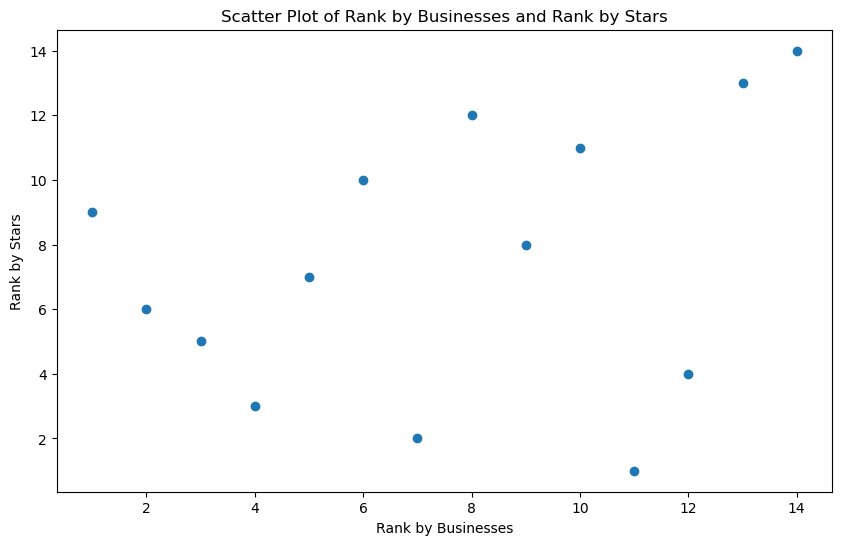

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(results['rank_by_businesses'], results['rank_by_stars'])
plt.title('Scatter Plot of Rank by Businesses and Rank by Stars')
plt.xlabel('Rank by Businesses')
plt.ylabel('Rank by Stars')
plt.show()

The above graph ranks each region by the number of businesses and the avg stars businesses recieve. It can be observed in the scatter plot thats the rank of states in both these indices is positively correlated. Average Star Ratings and ranks derived from it tell us how consumers find businesses in their states. The number of businesses and the ranks derived from this give us insights on how good an environment is for businesses to prosper. It can be seen that if the state can build a condusive environment for businesses, the consumer satisfaction also increases.

**Q4. What are the top 10 states relative to the number of businesses?**

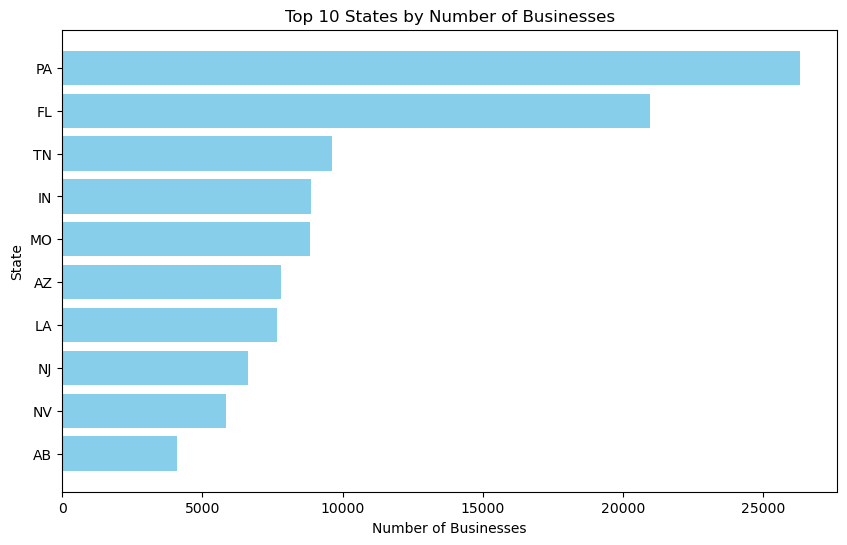

In [ ]:
results = results.head(10)
plt.figure(figsize=(10, 6))
plt.barh(results['state'], results['num_businesses'], color='skyblue')
plt.xlabel('Number of Businesses')
plt.ylabel('State')
plt.title('Top 10 States by Number of Businesses')
plt.gca().invert_yaxis()  # Inverting y-axis to display the state with the most businesses at the top
plt.show()

The above Graph looks at the top 10 states by their number of businesses. This graph can be interpreted in 2 very different ways. If we believe the dataset is complete or in proportion, then we can see that a lot of states can learn from the Pennsylvania and Florida. States can incentivise more businesses to start. on the other hand if Yelp believes this dataset is not complete(seems like the more likely case), it can now target states to increase its usage in those states. This would benefit Yelp increase market market share.

**Q5. What are the top ten states that customers frequently use Yelp to review the restaurants?**

In [ ]:
top_ten_state_reviewcount = (
    df_review
    .join(df_business, df_review.business_id == df_business.business_id, 'inner')
    .groupBy("state")
    .count()
    .toPandas()
    .sort_values(by='count', ascending=False)
    .head(10)
)

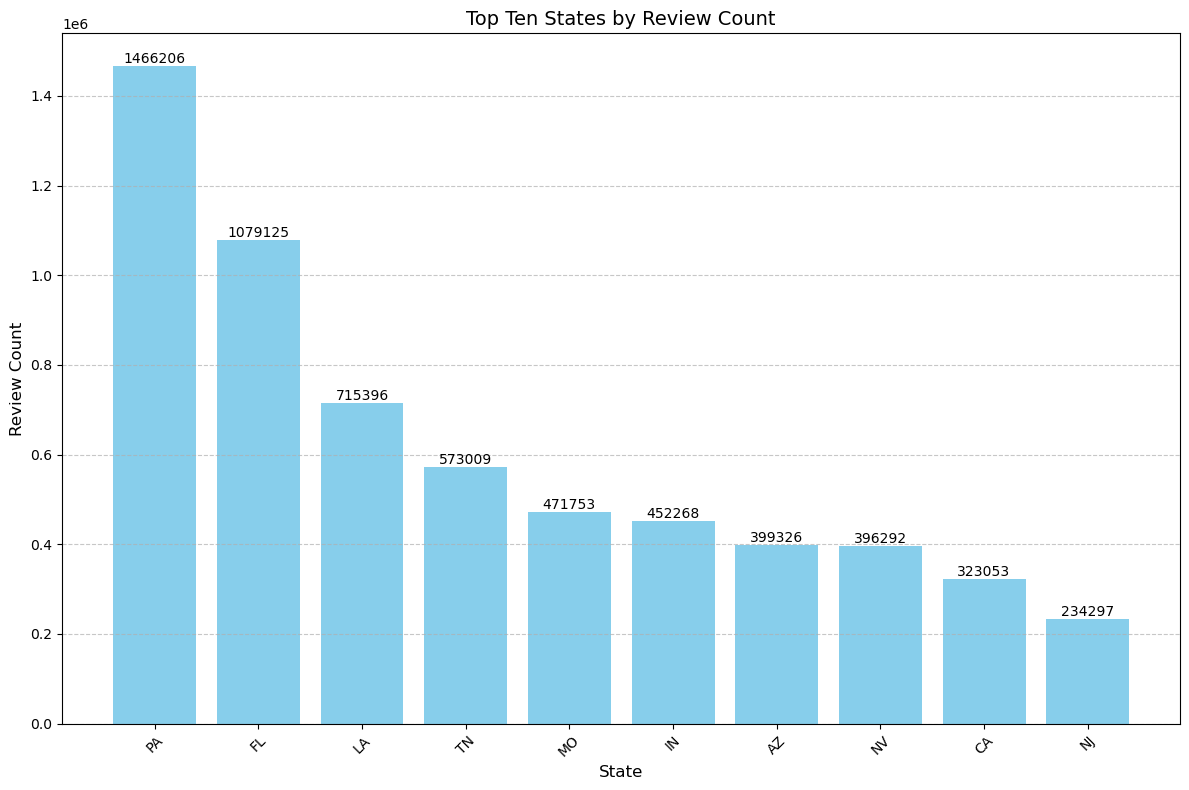

In [ ]:
plt.figure(figsize=(12, 8))
plt.bar(top_ten_state_reviewcount['state'], top_ten_state_reviewcount['count'], color='skyblue')

for i, count in enumerate(top_ten_state_reviewcount['count']):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom')

plt.xlabel('State', fontsize=12)
plt.ylabel('Review Count', fontsize=12)
plt.title('Top Ten States by Review Count', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

This graph elucidates the top ten states in terms of review volume on Yelp, a platform instrumental for customers seeking insights into restaurants before visiting. The data indicates that both Pennsylvania (PA) and Florida (FL) have amassed over one million reviews. Notably, while Louisiana (LA) ranks seventh in the number of businesses, it stands as the third-highest in review count, suggesting a comparatively higher level of customer engagement than Tennessee (TN). This analysis offers valuable perspective on consumer interaction and feedback trends across various states.

**Q6. What are the top ten cities that customers frequently use Yelp to review the restaurants?**

In [ ]:
df_review.join(df_business, df_review.business_id == df_business.business_id, 'inner') \
    .groupBy("city") \
    .count() \
    .toPandas() \
    .sort_values(by='count', ascending=False) \
    .head(10)

,city,count
75,Philadelphia,895211
295,New Orleans,600715
123,Nashville,423305
240,Tampa,423268
408,Tucson,374702
107,Indianapolis,334126
293,Reno,324065
428,Santa Barbara,250180
391,Saint Louis,235602
149,Boise,96401


In addition to the State level, we want to look at the city level to see which cities have high review counts for the restaurants. Phildelphia city still, has the highest review count compare to other cities.

**Q7. What are the top ten cities that customers frequently use Yelp to check-in?**

In [ ]:
df_checkin.join(df_business, df_checkin.business_id == df_business.business_id, 'inner') \
    .groupBy("city") \
    .count() \
    .toPandas() \
    .sort_values(by='count', ascending=False) \
    .head(10)

,city,count
97,Philadelphia,10071
324,Tampa,6565
571,Tucson,6332
141,Indianapolis,5461
160,Nashville,4979
406,New Orleans,4530
403,Reno,3931
398,Edmonton,3507
546,Saint Louis,3428
601,Santa Barbara,2350


As Yelp is offering the check-in function for customers when planning to dine in a restaurant, we want to briefly have an idea how frequently customers use Yelp to reservae a spot. From the above query result, we are able to see that customers in the  Philadelphia city use this check-in function with over 10,000 counts.

**Q8. What are the top ten cities that customers frequently use Yelp to give compliments the restaurants?**

In [ ]:
df_tips.join(df_business, df_tips.business_id == df_business.business_id, 'inner') \
    .groupBy("city") \
    .agg({'compliment_count': 'count'}) \
    .toPandas() \
    .sort_values(by='count(compliment_count)', ascending=False) \
    .head(10)

,city,count(compliment_count)
122,Philadelphia,109081
474,New Orleans,79013
380,Tampa,59334
670,Tucson,53242
177,Indianapolis,50547
194,Nashville,48492
641,Saint Louis,39644
467,Reno,39201
700,Santa Barbara,26464
460,Edmonton,12168


Providing compliments meaning that customers had a great experience in the restaurants. Here we break it done by cities and order them by the compliment count to see which city overall provide customers a good experience. Both Philadelphia and New Orleans city ranked to be the top two in this dataset.

**Q9. Does the distribution of ratings vary among states?**

This is an important question for current and future business owners. If distribtions vary among states, this could infer that it might be better to open in specific states. For example, if ratings skew lower and you're an established franchise with typically a high star rating, you may want to look in these states. Another insight could be that if the ratings skew on the high end, that state may have too many businesses that could cause a high barrier to entry and too much competition for new businesses.

First we need to join the business dataframe to the reviews, so that we can group reviews by the state of the business. Then we can filter down to only states with at least 50 reviews, as a handful only have a couple reviews (which is not a large enough sample to provide any insight).

In [ ]:
biz_data = df_business.select('business_id', 'state')
joinExpression = df_review['business_id'] == biz_data['business_id']
biz_w_review = df_review.join(biz_data, joinExpression, 'left_outer')

In [ ]:
biz_w_review.groupBy("state").count()\
            .filter(F.col("count") > 50)\
            .orderBy('count', ascending=False)\
            .select("state")\
            .show()

+-----+
|state|
+-----+
|   PA|
|   FL|
|   LA|
|   TN|
| null|
|   MO|
|   IN|
|   AZ|
|   NV|
|   CA|
|   NJ|
|   ID|
|   AB|
|   DE|
|   IL|
+-----+



In [ ]:
states = biz_w_review.groupBy("state")\
            .count()\
            .filter(F.col("count") > 50)\
            .orderBy('count', ascending=False)\
            .select("state").collect()

states_list = [states[i][0] for i in range(0, len(states))]

In [ ]:
biz_w_review.filter(F.col('state').isin(states_list)).select('stars', 'state').show()

+-----+-----+
|stars|state|
+-----+-----+
|  3.0|   PA|
|  5.0|   PA|
|  5.0|   PA|
|  4.0|   LA|
|  1.0|   PA|
|  5.0|   LA|
|  5.0|   PA|
|  3.0|   CA|
|  5.0|   FL|
|  4.0|   IN|
|  4.0|   MO|
|  4.0|   PA|
|  4.0|   AZ|
|  5.0|   FL|
|  5.0|   PA|
|  4.0|   MO|
|  5.0|   FL|
|  5.0|   PA|
|  5.0|   MO|
|  3.0|   IN|
+-----+-----+
only showing top 20 rows



In [ ]:
plot_slice = biz_w_review.filter(F.col('state').isin(states_list)).select('stars', 'state').toPandas()

<Figure size 1000x600 with 0 Axes>

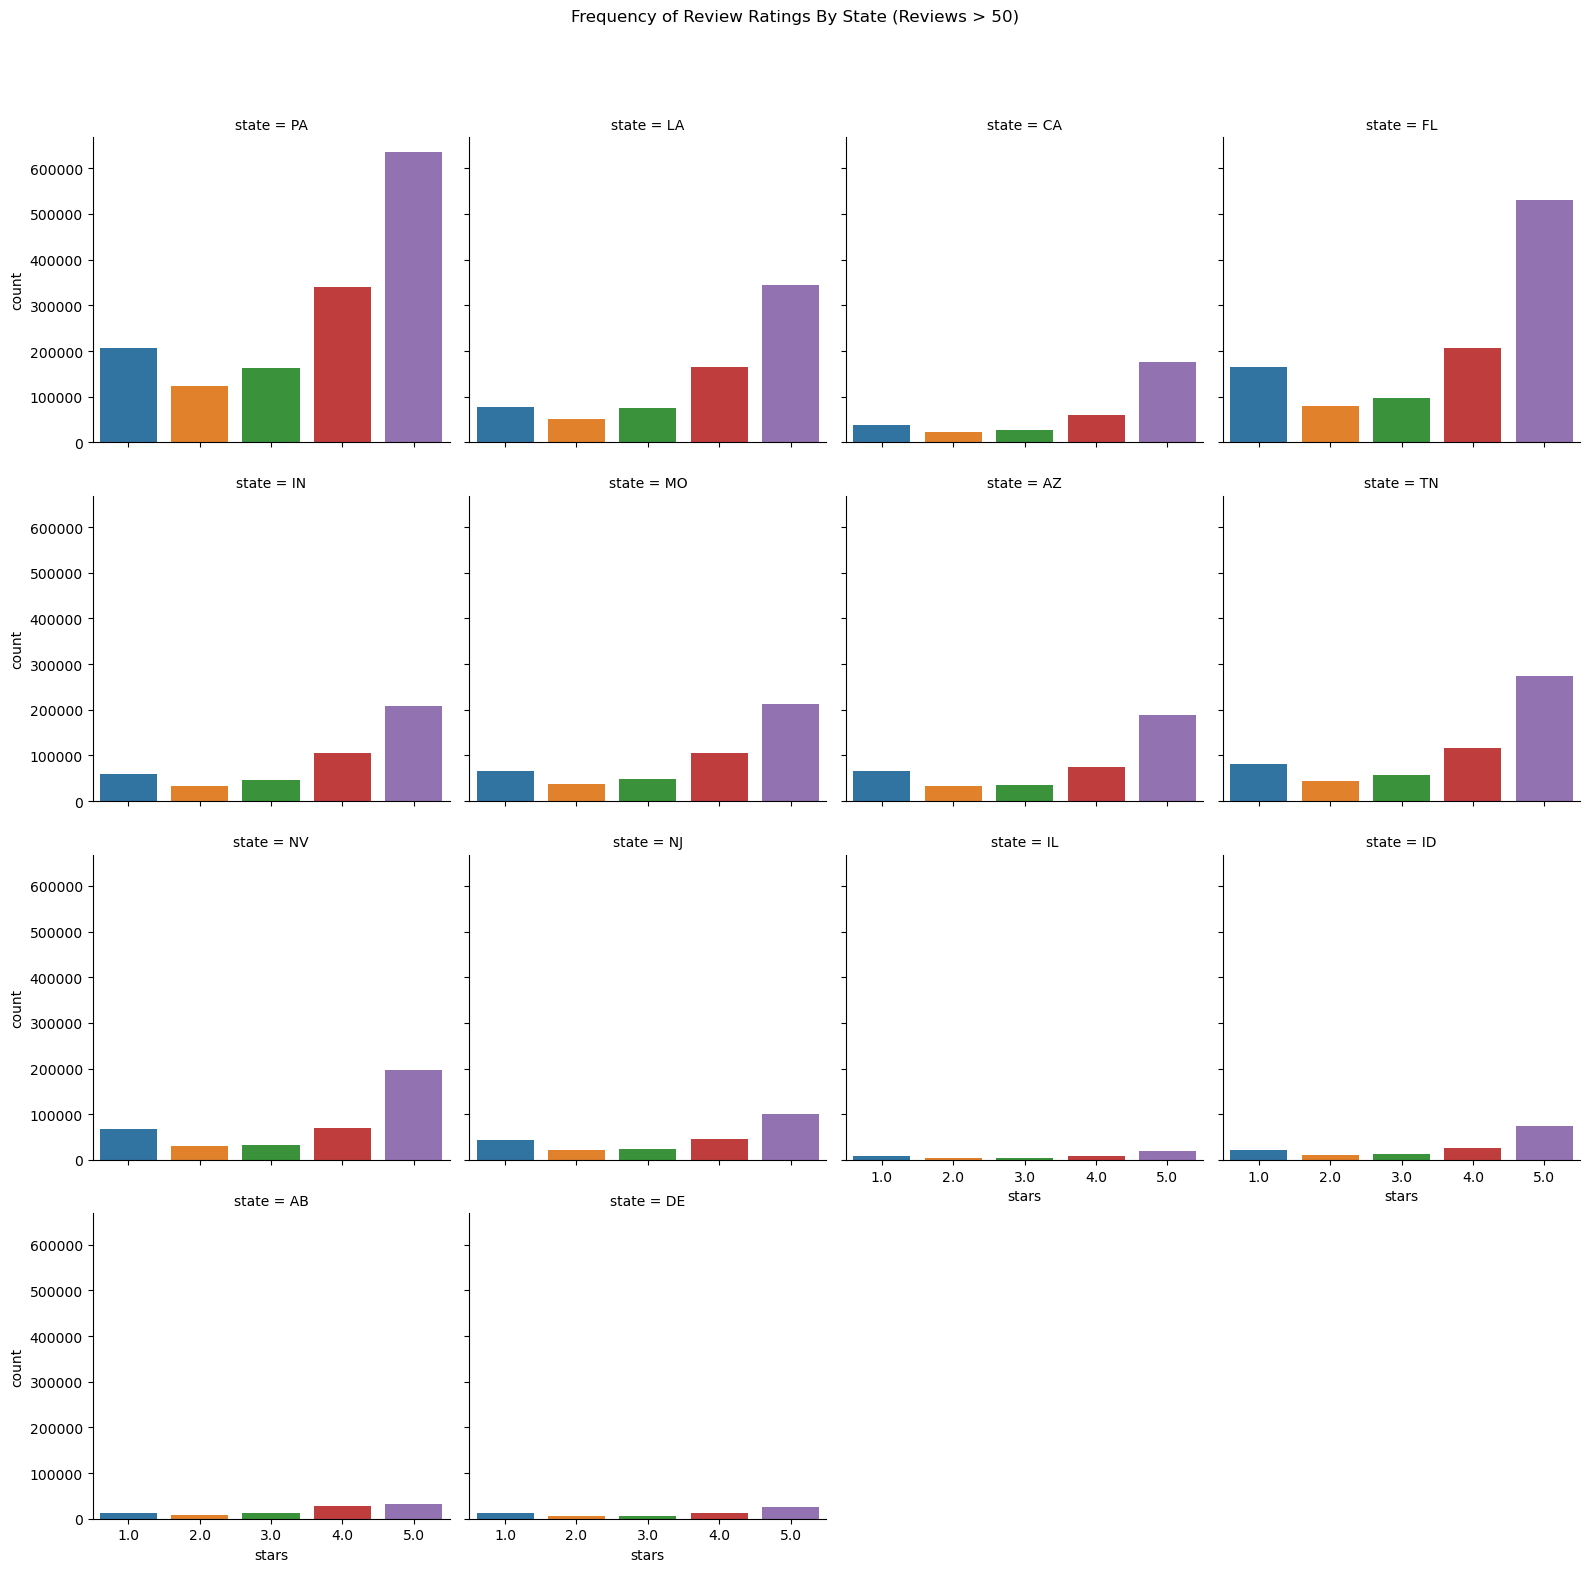

In [ ]:
plt.figure(figsize=(10, 6))
sns.catplot(data=plot_slice, x='stars', kind='count', col='state', col_wrap=4, height=4)

plt.subplots_adjust(top=0.9)
plt.suptitle('Frequency of Review Ratings By State (Reviews > 50)')
plt.show();

In prior analyses, we focused on identifying states with the highest volume of reviews. Building on this, our current graph shifts to understanding the distribution of ratings across various states. The count of reviews in each rating is irrelevant, as the main insight here is the shape that the distributions take. If you look closely across each state, you'll notice that the distributions are relatively the same, with the highest frequency of ratings falling at 5, then 4, then 1. This suggests that at this level of aggregation there is no difference among states in terms of ratings. Given this result, we should drill further into specific categories or cities.

**Q10. What are the top 10 most rated and least rated business categories based on their ratings from the users?**

In [ ]:
df_business_1 = df_business.withColumn("category", F.explode(F.split(F.col("categories"), ", ")))
avg_rating_per_category = df_business_1.groupBy("category") \
                                              .agg(F.avg("stars").alias("average_stars")) \
                                              .orderBy(F.desc("average_stars"))\
                                              .limit(10)

avg_rating_per_category.show()

+------------------+-------------+
|          category|average_stars|
+------------------+-------------+
|        Patent Law|          5.0|
|   Water Suppliers|          5.0|
|Editorial Services|          5.0|
|           Embassy|          5.0|
| IP & Internet Law|          5.0|
|            Mohels|          5.0|
|       Calligraphy|          5.0|
|    Karaoke Rental|          5.0|
|       Experiences|          5.0|
|   Art Consultants|          5.0|
+------------------+-------------+



In [ ]:
avg_rating_per_category = df_business_1.groupBy("category") \
                                              .agg(F.avg("stars").alias("average_stars")) \
                                              .orderBy(F.asc("average_stars"))\
                                              .limit(10)

avg_rating_per_category.show()

+--------------------+------------------+
|            category|     average_stars|
+--------------------+------------------+
|Electricity Suppl...|               1.5|
|           Foot Care|               1.5|
|            Sledding|               2.0|
|        Pathologists|               2.0|
|       DIY Auto Shop|               2.0|
|   Behavior Analysts| 2.142857142857143|
|Television Servic...|2.2016806722689077|
|          Urologists|2.2708333333333335|
|        Car Auctions|               2.3|
|  University Housing|2.3229166666666665|
+--------------------+------------------+



The insights derived from these query outcomes enable a nuanced comprehension of customer preferences, as manifested through their reviews. The analysis delineates a clear dichotomy in user sentiment: on one end of the spectrum, business categories such as Mohels, Embassy, Water Suppliers, and Art Consultants are universally acclaimed, consistently garnering the pinnacle of ratings. Conversely, on the opposite end, categories including Electricity Suppliers, Foot Care, Sledding , and Car Auctions appear to be less favored, with average ratings approximating 2. This data not only reflects the collective approval or disapproval of services but also potentially guides future improvements in customer satisfaction and business strategies.

**Q11. What are the top 5 businesses with the most checkins recorded?**

In [ ]:
df_checkin_1 = df_checkin.withColumn("checkin_date", explode(split(col("date"), ",\s*")))
joined_df = df_business.join(df_checkin_1, "business_id")
top_business_checkins = joined_df.groupBy("business_id", "name") \
                                 .agg(count("checkin_date").alias("total_checkins")) \
                                 .orderBy(col("total_checkins").desc()) \
                                 .limit(5)

top_business_checkins.select('name', 'total_checkins').show()

+--------------------+--------------+
|                name|total_checkins|
+--------------------+--------------+
|Philadelphia Inte...|         52144|
|       Café Du Monde|         40109|
|Louis Armstrong N...|         37562|
|Tampa Internation...|         37518|
|Nashville Interna...|         31168|
+--------------------+--------------+



The query results identify the top five businesses with the highest customer check-ins, offering key insights into customer footfall and popularity. This information is crucial for understanding market trends, guiding marketing strategies, and assessing competitive standing. High check-in counts can indicate successful customer engagement and attraction, serving as a valuable metric for business growth and strategic decision-making.

**Q12. Which businesses demonstrate both high engagement and consistent quality, based on their tip and review counts, and stable yearly ratings?**

In [ ]:
engagement_df = df_tips.groupBy("business_id") \
                      .agg(count("*").alias("total_tips")) \
                      .join(df_review.groupBy("business_id") \
                                    .agg(count("*").alias("total_reviews")), "business_id")
rating_df = df_review.withColumn("year", year("date")) \
                           .groupBy("business_id", "year") \
                           .agg(avg("stars").alias("avg_yearly_stars"))
window = Window.partitionBy("business_id")
performance = engagement_df.where((col("total_tips") > 100) & (col("total_reviews") > 500)) \
                                                      .join(rating_df, "business_id") \
                                                      .withColumn("rating_variance", stddev("avg_yearly_stars").over(window)) \
                                                      .where(col("rating_variance") < 0.5)
df = performance.join(df_business, "business_id") \
                .select(df_business["name"], "total_tips", "total_reviews", "rating_variance").distinct()
df.show()

24/04/01 22:43:10 WARN BlockManagerMasterEndpoint: No more replicas available for rdd_23_34 !
24/04/01 22:43:10 WARN BlockManagerMasterEndpoint: No more replicas available for rdd_23_26 !
24/04/01 22:43:10 WARN BlockManagerMasterEndpoint: No more replicas available for rdd_87_19 !
24/04/01 22:43:10 WARN BlockManagerMasterEndpoint: No more replicas available for rdd_23_5 !
24/04/01 22:43:10 WARN BlockManagerMasterEndpoint: No more replicas available for rdd_23_29 !
24/04/01 22:43:10 WARN BlockManagerMasterEndpoint: No more replicas available for rdd_23_7 !
24/04/01 22:43:10 WARN BlockManagerMasterEndpoint: No more replicas available for rdd_87_0 !
24/04/01 22:43:10 WARN BlockManagerMasterEndpoint: No more replicas available for rdd_23_21 !
24/04/01 22:43:10 WARN BlockManagerMasterEndpoint: No more replicas available for rdd_87_1 !
24/04/01 22:43:10 WARN BlockManagerMasterEndpoint: No more replicas available for rdd_87_3 !
24/04/01 22:43:10 WARN BlockManagerMasterEndpoint: No more replic

+--------------------+----------+-------------+-------------------+
|                name|total_tips|total_reviews|    rating_variance|
+--------------------+----------+-------------+-------------------+
|     Oxford Exchange|       243|         1938| 0.1789264886802334|
|Handlebar Coffee ...|       146|         1065|0.18551480869157583|
|Bittercreek Alehouse|       141|         1034|0.26106257440942043|
|          Two Chicks|       127|         1549|0.23319761664491814|
|     Eat New Orleans|       141|          926| 0.2885891934864878|
|                Fork|       210|         1872| 0.2767063698781251|
|       Tropical Isle|       120|          583| 0.2893085521719972|
|              El Vez|       333|         3264|   0.35054080688655|
|        Finch & Fork|       131|         1434|0.28000972138271774|
|   Hansen's Sno-Bliz|       123|          520|0.27052641665917476|
| The Patterson House|       185|         1219|0.22227237990127358|
|  Chickie's & Pete's|       129|          603|0

This query uncovers businesses that consistently engage customers and maintain quality over time, as shown by their substantial number of tips and reviews combined with low variance in annual star ratings. In this query, minimum tips of 100 and minimum reviews of 500 are considered, as a random assignment, in order to carry out the analysis of moderate level businesses. Businesses highlighted in these results likely excel in customer satisfaction and retention, indicating a successful blend of quality service and active customer interaction. This data is instrumental for identifying industry leaders and models of operational excellence, offering valuable benchmarks for businesses striving to enhance their own customer engagement and service consistency.

**Q13. What are the top 5 most popular business categories based on the number of reviews recorded?**

In [ ]:
popular_categories = df_business.join(df_review, "business_id") \
                                .withColumn("category", explode(split(col("categories"), ", "))) \
                                .groupBy("category") \
                                .count() \
                                .orderBy(col("count").desc()) \
                                .limit(5)

popular_categories.show()

+--------------------+-------+
|            category|  count|
+--------------------+-------+
|         Restaurants|4557625|
|                Food|1749262|
|           Nightlife|1498579|
|                Bars|1422790|
|American (Traditi...| 990473|
+--------------------+-------+



This query reveals the top five most popular business categories based on the number of reviews they receive. Such information is crucial for understanding consumer engagement in providing feedback to the business. Businesses can use these insights to identify potential areas for marketing investment. It also helps in pinpointing which sectors are currently thriving in terms of customer interest and engagement.

**Q14. What are the most and least popular business categories in each state based on their ratings?**

In [ ]:
df_business.createOrReplaceTempView("business")
query = """
WITH StateCategoryRatings AS (
    SELECT state, category, AVG(stars) as avg_rating
    FROM (
        SELECT state, EXPLODE(SPLIT(categories, ', ')) AS category, stars
        FROM business
    )
    GROUP BY state, category
),
RankedCategories AS (
    SELECT state, category, avg_rating,
    RANK() OVER (PARTITION BY state ORDER BY avg_rating DESC) as rank_desc,
    RANK() OVER (PARTITION BY state ORDER BY avg_rating ASC) as rank_asc
    FROM StateCategoryRatings
)
SELECT state, category, avg_rating,
    CASE
        WHEN rank_desc = 1 THEN 'Most Popular'
        WHEN rank_asc = 1 THEN 'Least Popular'
    END as Popularity
FROM RankedCategories
WHERE rank_desc = 1 OR rank_asc = 1
"""
category_popularity_ratings = spark.sql(query)
category_popularity_ratings_pd = category_popularity_ratings.toPandas()

In [ ]:
category_popularity_ratings_pd.head()

,state,category,avg_rating,Popularity
0,AB,Television Service Providers,1.0,Least Popular
1,AB,Lawn Services,1.0,Least Popular
2,AB,Telecommunications,1.0,Least Popular
3,AB,Funeral Services & Cemeteries,5.0,Most Popular
4,AB,Distilleries,5.0,Most Popular


In [ ]:
states = category_popularity_ratings_pd['state'].unique()
state_widget = widgets.Dropdown(options=states, description='State:')
output = widgets.Output()
def create_bar_chart(state):
    with output:
        output.clear_output(wait=True)
        filtered_df = category_popularity_ratings_pd[category_popularity_ratings_pd['state'] == state]
        filtered_df = filtered_df.sort_values(by='avg_rating', ascending=False)
        fig = go.Figure(data=[go.Bar(x=filtered_df['category'], y=filtered_df['avg_rating'])])
        fig.update_layout(title=f'Business Categories in {state} by Average Rating',
                          xaxis_title='Category',
                          yaxis_title='Average Rating')
        fig.show()
def on_state_change(change):
    state = change['new']
    create_bar_chart(state)
state_widget.observe(on_state_change, names='value')
display(state_widget, output)
create_bar_chart(states[0])

Dropdown(description='State:', options=('AB', 'AZ', 'CA', 'CO', 'DE', 'FL', 'HI', 'ID', 'IL', 'IN', 'LA', 'MI'…

Output()

Note: Kindly run the above cell to view the graph plotted here, in case the graph is not visible.

This graph offers insights into both well-established and nascent market segments, guiding entrepreneurs and expanding businesses in identifying untapped opportunities and saturated markets. It highlights regions lacking certain services, suggesting potential areas for new ventures where customer needs are not fully met. Conversely, it advises caution in entering areas with highly popular businesses, indicating competitive markets where establishing a new foothold might be challenging. This strategic analysis is invaluable for making informed decisions about business development and market entry.

### 6. Key Observations and Summary

#### 6.1 Key Observations

1. Examination of review volumes across states such as Pennsylvania (PA) and Florida (FL) shows a robust engagement with Yelp's restaurant review system. The count of over one million reviews in each of these states shows us that a considerable willingness among customers to contribute feedback and sharing their experiences.
2. Insights learned from compliment counts shed light on the quality of dining experiences across various cities. Notably, both Philadelphia and New Orleans emerge as leading cities. This  suggests these two cities are capable of providing exceptional dining encounters, as evidenced by the positive feedback garnered.
3. Insights from the most and least popular businesses aids both entrepreneurs and Yelp in enhancing service offerings and grasping their market forte. For instance, in Florida, there is room for growth and improvement in Mobile Home Dealers and Home Developer sectors, indicating these markets have potential yet to be fully tapped.
4. Broadly speaking, the restaurant sector garners the highest volume of reviews, reflecting its significant engagement with consumers.
5. Overall, categories such as Mohels and Patent Law have achieved the highest ratings, while Electricity Supply and Foot Care represent areas with lower ratings, indicating differing levels of customer satisfaction and engagement across these business categories.
6. The uniformity observed across various state distributions presents a challenge in conclusively determining the comparative feasibility of business ventures in one state over another. This consistency in trend implies the necessity to delve deeper, focusing on specific categories or city-level data within states, to extract more nuanced insights and facilitate more informed business decisions.
7. It was observed that 5-star ratings are the most common. This suggests a generally positive sentiment from users or users are more likely to leave a review when they have an exceptional experience.
8. A trend of increasing yearly review counts was observed, peaking around 2019 before a dramatic drop occurred in 2020 and 2021. This shows that Yelp has gained great success in their business since they founded and COVID-19 may be the main cause of the review amount decrease in 2020 and 2021. Yelp should maintain its main business strategy and try some new methods to recover its business from the COVID-19.
9. States ranks on review score and num of businesses show a positive correlation, more businesses also mean a more overall satisfied customer. This relationships could signify that the more competitive a market is, the more satisfied a customer is overall.
10. Pennsylvania and Florida were the top two states with a considerable number of businesses in our dataset. States could try to follow Penn and Florida’s business practices to add more businesses. Yelp could use better strategies to expand in other states.

#### 6.2 Summary

Analyzing Yelp's data reveals crucial insights: High user engagement in states like Pennsylvania and Florida is reflected in over a million reviews, indicating strong customer feedback. Philadelphia and New Orleans stand out for their exemplary dining experiences. While the restaurant sector leads in review volume, varied satisfaction across different categories suggests diverse consumer experiences. The trend of uniformly distributed reviews across states and the impact of COVID-19 on recent trends highlight the need for more localized, nuanced analysis and adaptive business strategies.

### 7. References

Throughout the duration of this project, ChatGPT has been utilized for the following purposes:
1. To refine and articulate sentences in a professional and formal manner, ensuring clarity and precision in communication.
2. To comprehend the application of the 'explode' function within PySpark, which is instrumental in segregating array values in a dataset, transforming them from a consolidated row format into distinct individual rows.